In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [3]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_0_17")
#results_PQK = load_feather_folder_as_pd("../data/results/DE_0_24")
results_FQK = load_feather_folder_as_pd("../data/results/DE_0_27")
results_classical = load_feather_folder_as_pd("../data/results/DE_0_28")

['../data/results/DE_0_17\\0.feather', '../data/results/DE_0_17\\0_T.feather']
0.04075145721435547
['../data/results/DE_0_27\\0.feather']
0.004014730453491211
['../data/results/DE_0_28\\0.feather']
0.004466533660888672


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [11]:
f_initial =  [np.cos(0), -np.sin(0)]
x_line = np.linspace(-2*3.14, 2*3.14, 40)
f_odeint = odeint(mapping_of_derivatives_of_loss_functions["harmonic_oscillator"], f_initial, x_line[:])[:,0].flatten()

In [12]:
results_QNN["f_sol"][0]

array([ 0.99926144,  0.96004995,  0.82212259,  0.59966155,  0.31554109,
       -0.00102446, -0.31748467, -0.60129993, -0.82328733, -0.96062128,
       -0.99918061, -0.93500051, -0.77468021, -0.53470443, -0.23974838,
        0.07985949,  0.39125592,  0.66242196,  0.86547534,  0.97953735,
        0.99287972,  0.90413054,  0.72241532,  0.4664187 ,  0.16246319,
       -0.15819739, -0.46259153, -0.7194203 , -0.90227563, -0.99235565,
       -0.980398  , -0.86763221, -0.66565329, -0.39522943, -0.08416663,
        0.23555049,  0.53104744,  0.77194014,  0.93345911,  0.99899637])

In [13]:
results_QNN["f_sol"][1].shape

(20,)

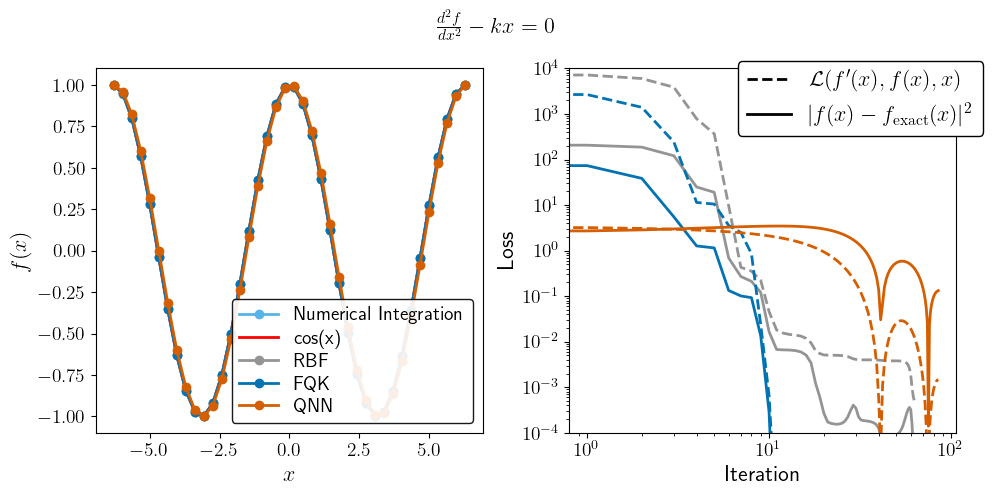

In [20]:
from matplotlib.colors import ListedColormap

#cmap = get_cmap("tab10")  # or another colormap of your choice

cmap = ListedColormap(sns.color_palette("colorblind", 10))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


x_span_plot = x_line
ax1.plot(x_span_plot, f_odeint,"-o", label="Numerical Integration", color=cmap.colors[9], linewidth=2)
ax1.plot(x_span_plot, np.cos(x_span_plot), "-", label="cos(x)", color="red", linewidth=2)
ax1.plot(x_span_plot, results_classical["f_sol"][0], "-o", label="RBF", color=cmap.colors[7], linewidth=2)
ax1.plot(x_span_plot, results_FQK["f_sol"][0], "-o", label="FQK", color=cmap.colors[0], linewidth=2)
#ax1.plot(x_span_plot, results_PQK["f_sol"][0], "-o", label="PQK", color="C2", linewidth=2)
ax1.plot(x_span_plot, results_QNN["f_sol"][0], "-o", label="QNN", color=cmap.colors[3], linewidth=2)
#plt.ylim(-3, 3)


ax1.legend()


#ax2 is for the errors
ax2.plot(results_classical["loss_history"][0], color=cmap.colors[7], linestyle="--", linewidth=2)
ax2.plot(results_classical["mse_history"][0],  color=cmap.colors[7],  linewidth=2)


#ax2.plot(results_PQK["loss_history"][0], color="C2", linestyle="--", linewidth=2)
#ax2.plot(results_PQK["mse_history"][0],  color="C2", linewidth=2)

ax2.plot(results_FQK["loss_history"][0], color=cmap.colors[0], linestyle="--", linewidth=2)
ax2.plot(results_FQK["mse_history"][0],  color=cmap.colors[0], linewidth=2)

ax2.plot(results_QNN["loss_history"][0], color=cmap.colors[3], linestyle="--", linewidth=2)
ax2.plot(results_QNN["mse_history"][0],  color=cmap.colors[3], linewidth=2)




# dummy plot for legend
ax2.plot([10**-12, 1.2*10**-12 ], color="black", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot([10**-12, 1.2*10**-12 ], color="black", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)




ax1.legend(fontsize=14, loc="lower right", edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)


plt.suptitle(r"$\frac{d^2f}{dx^2} - kx = 0$", fontsize = 16)

ax1.set_ylabel("$f(x)$", fontsize = 16)
ax1.set_xlabel("$x$", fontsize = 16)
#change xlabel number size 
ax1.tick_params(axis='both', which='major', labelsize=14)


ax2.set_ylabel("Loss", fontsize = 16)
ax2.set_xlabel("Iteration", fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)


ax2.set_yscale("log")
ax2.set_xscale("log")

ax2.set_ylim(10**-4, 10**4)


plt.tight_layout()
plt.show()

fig.savefig("../plotting_notebooks/DE_sho.png", bbox_inches='tight', dpi = 400)
